# UCI Breast Cancer — Single-Feature Bayes Posterior

**Goal.** Compute a simple posterior probability of **malignancy** given one feature value using Bayes’ theorem with **Gaussian class-conditional** assumptions.

**Dataset.** Wisconsin Diagnostic Breast Cancer (scikit-learn wrapper). Target: `0 = malignant`, `1 = benign`.

**What this cell does**
- Loads the dataset.
- Shows basic shape/class balance.
- Lets you choose a **single feature** (default: `mean radius`) and a **query value** `x0` (default: `14.0`).

> You can change `feature` and `x0` to explore different scenarios.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

# Load UCI Breast Cancer (Wisconsin Diagnostic) from scikit-learn
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")  # 0 = malignant, 1 = benign

print(f"X shape: {X.shape}, y distribution: {(y.value_counts(normalize=True)*100).round(1).to_dict()}")

# Choose a single feature and a query value x0
feature = "mean radius"   # you can change this, e.g. "mean texture"
x0 = 14.0                 # change this to test other values

X.head()


X shape: (569, 30), y distribution: {1: 62.7, 0: 37.3}


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Bayes posterior with one feature

We model the chosen feature as **Gaussian** within each class:

- Priors from class frequencies:  \( P(M), P(B) \).
- Likelihoods at \( x_0 \):  
  \( p(x_0 \mid M) = \mathcal{N}(x_0;\mu_M,\sigma_M^2) \),  
  \( p(x_0 \mid B) = \mathcal{N}(x_0;\mu_B,\sigma_B^2) \).

Two-class Bayes posterior:
\[
P(M \mid x_0)=\frac{p(x_0\mid M)P(M)}{p(x_0\mid M)P(M)+p(x_0\mid B)P(B)}.
\]

**What this cell outputs**
- A compact table with: priors, class means/variances for the feature, both likelihoods at \( x_0 \), and the posterior \( P(M\mid x_0) \).
- This meets the assignment’s “compute a simple Bayes posterior probability” requirement.


In [2]:
# Split by class for the chosen feature
x_mal = X.loc[y == 0, feature]  # malignant
x_ben = X.loc[y == 1, feature]  # benign

# Priors (class frequencies)
p_mal = float((y == 0).mean())
p_ben = float((y == 1).mean())

# Class-conditional Gaussian parameters
mu_mal, var_mal = float(x_mal.mean()), float(x_mal.var(ddof=1))
mu_ben, var_ben = float(x_ben.mean()), float(x_ben.var(ddof=1))

def gaussian_pdf(x, mu, var):
    return (1.0 / np.sqrt(2*np.pi*var)) * np.exp(-((x - mu) ** 2) / (2 * var))

# Likelihoods at x0
lx_mal = gaussian_pdf(x0, mu_mal, var_mal)  # p(x0 | malignant)
lx_ben = gaussian_pdf(x0, mu_ben, var_ben)  # p(x0 | benign)

# Bayes posterior (two classes)
num = lx_mal * p_mal
den = lx_mal * p_mal + lx_ben * p_ben
post_mal = float(num / den)  # P(malignant | x0)

summary = pd.DataFrame({
    "quantity": [
        "feature", "x0 (feature value)",
        "P(malignant)", "P(benign)",
        "μ_malignant", "σ²_malignant",
        "μ_benign", "σ²_benign",
        "likelihood p(x0|malignant)", "likelihood p(x0|benign)",
        "posterior P(malignant|x0)"
    ],
    "value": [
        feature, x0,
        p_mal, p_ben,
        mu_mal, var_mal,
        mu_ben, var_ben,
        lx_mal, lx_ben,
        post_mal
    ]
})
summary


,quantity,value
0,feature,mean radius
1,x0 (feature value),14.0
2,P(malignant),0.372583
3,P(benign),0.627417
4,μ_malignant,17.46283
5,σ²_malignant,10.265431
6,μ_benign,12.146524
7,σ²_benign,3.170222
8,likelihood p(x0|malignant),0.069433
9,likelihood p(x0|benign),0.130334


## Visualizing the posterior as a function of the feature

This plot shows \( P(\text{malignant} \mid x) \) across a range of **feature** values, with a dashed line at your chosen \( x_0 \).

**Why this helps**
- Builds intuition about **decision boundaries** and how evidence strength changes with the feature value.
- Reveals regions where either class dominates under the Gaussian assumption.


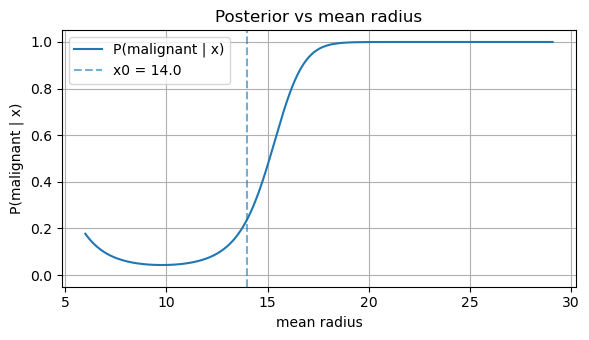

In [3]:
xs = np.linspace(min(X[feature].min(), x0) - 1, max(X[feature].max(), x0) + 1, 400)

like_m = gaussian_pdf(xs, mu_mal, var_mal)
like_b = gaussian_pdf(xs, mu_ben, var_ben)

post_curve = (like_m * p_mal) / (like_m * p_mal + like_b * p_ben)

plt.figure(figsize=(6, 3.5))
plt.plot(xs, post_curve, label="P(malignant | x)")
plt.axvline(x0, linestyle="--", alpha=0.6, label=f"x0 = {x0}")
plt.ylim(-0.05, 1.05)
plt.title(f"Posterior vs {feature}")
plt.xlabel(feature); plt.ylabel("P(malignant | x)")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()


## Save artifacts for the report

This cell saves:
- `breast_cancer_posterior_summary.csv` — numeric summary (priors, likelihoods, posterior).
- `breast_cancer_posterior_plot.png` — the posterior curve figure.

Attach these to your submission and cite the dataset (see notes below).


Saved to C:\Users\Dell\Desktop\Group_2\outputs


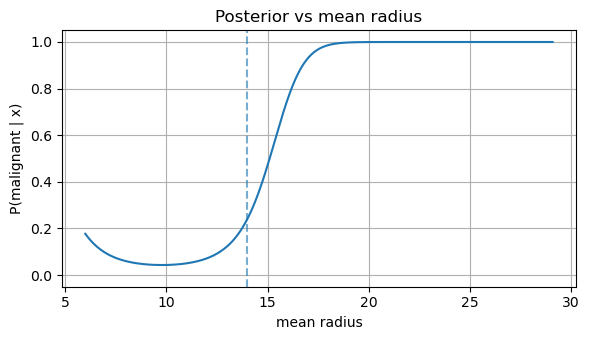

In [4]:
from pathlib import Path
out_dir = Path("../outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# Save table and figure
summary.to_csv(out_dir / "breast_cancer_posterior_summary.csv", index=False)
plt.figure(figsize=(6,3.5))
plt.plot(xs, post_curve)
plt.axvline(x0, linestyle="--", alpha=0.6)
plt.ylim(-0.05, 1.05)
plt.title(f"Posterior vs {feature}")
plt.xlabel(feature); plt.ylabel("P(malignant | x)")
plt.grid(True); plt.tight_layout()
plt.savefig(out_dir / "breast_cancer_posterior_plot.png", dpi=150)
print(f"Saved to {out_dir.resolve()}")
